In [1]:
%matplotlib inline
import qiskit
import numpy as np
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_state_city #plot de operador densidade
from qiskit.visualization import plot_state_qsphere #qsphere
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from math import pi, sqrt

In [2]:
qc_cx = QuantumCircuit(2,name="qc")
qc_cx.x(0)
qc_cx.x(1)
qc_cx.cx(0,1)
qc_cx.draw()


┌───┐     
q_0: ┤ X ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [3]:
simulator_state = Aer.get_backend('statevector_simulator')
job_state = execute(qc_cx, simulator_state)
result_state = job_state.result()

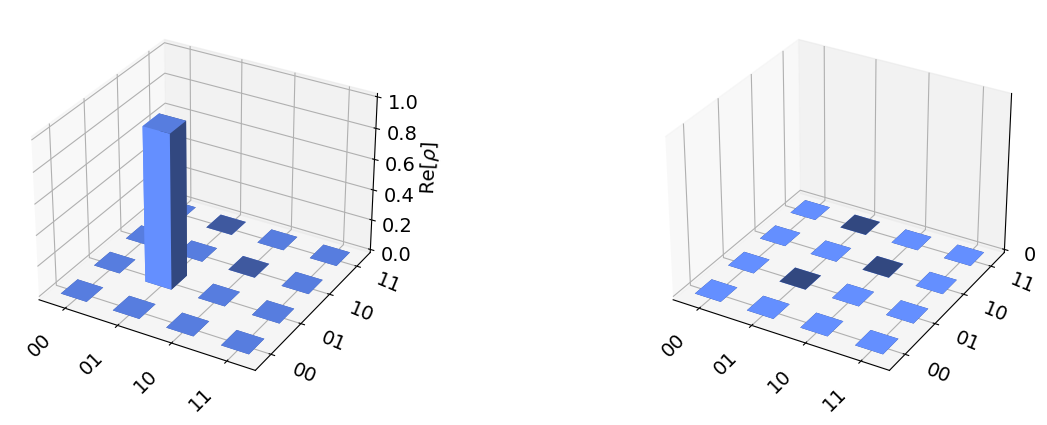

In [4]:
psi = result_state.get_statevector(qc_cx)

plot_state_city(psi)

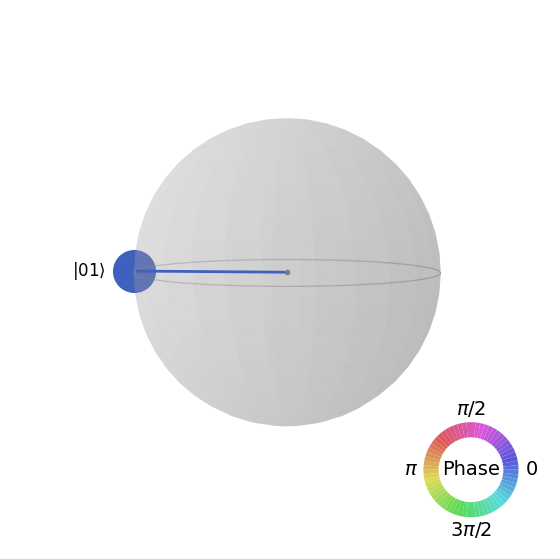

In [5]:
# O plot_state_qsphere aparentemente só funciona instalando o seaborn (pip install seaborn). Esta função demora bastante para executar
# https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html

psi = result_state.get_statevector(qc_cx)

plot_state_qsphere(psi)

In [6]:
#Conseguimos a matrix unitaria associada da mesma forma:

backend = Aer.get_backend('unitary_simulator')

cx_unitary = execute(qc_cx,backend)
cx_unitary.result().get_unitary(qc_cx, decimals = 3)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [ ]:
#Para o QASM simulator não muda nada
